<a href="https://colab.research.google.com/github/mrp-78/implement-regression/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download covid19 new cases data

In [3]:
import csv
import requests
import pandas as pd
import io
import numpy as np

CSV_URL = 'https://covid19.who.int/WHO-COVID-19-global-data.csv'

with requests.Session() as s:
    download = s.get(CSV_URL)
    data = download.content.decode('utf-8')
    df = pd.read_csv(io.StringIO(data)) # get world data from WHO site

df = df[df['Country'] == 'Iran (Islamic Republic of)'] # filter data to get data of Iran
data = np.array(df['New_cases'])
data = np.trim_zeros(data) # remove zeros from start of array
data

array([    6,     3,    13,    10,    15,     4,    48,    44,     0,
         249,     0,   205,     0,   908,  1421,   591,  1234,  1076,
         743,   595,   881,   958,  1075,  1289,  1365,  1254,  1008,
        1178,  1192,  1046,  1233,   966,  1028,  1411,  1762,  2206,
        2389,  2926,  3076,  2901,  3186,  3111,  2987,  2875,  2715,
        2560,     0,  2483,  2274,  2089,  1997,  1634,  1972,  1837,
        1657,  1617,  1574,  1512,  1606,  1499,  1374,  1343,  1294,
        1297,  1194,  1030,  1168,  1134,  1153,   991,  1112,  1073,
         983,  1006,   802,   976,  1223,  1323,  1680,  1485,  1556,
        1529,  1383,  1683,  1481,  1958,  1808,  2102,  1757,  1806,
        2294,  2111,  2346,  2392,  2311,  1869,  2180,  2023,  1787,
        2080,  2258,  2819,  2282,  2516,  2979,  3117,  3134,  3574,
        2886,  2269,  2364,  2043,  2095,  2011,  2238,  2369,  2410,
        2472,  2449,  2563,  2612,  2596,  2615,  2322,  2368,  2573,
        2445,  2531,

# Preprocess and Clean data

In [4]:
X = np.array([i for i in range(1, len(data)+1)])
zero_indices = np.where(data == 0)[0] # find data leaking indices
data = np.delete(data, zero_indices) #remove data with 0 values
X = np.delete(X, zero_indices) # remove day's corresponding 0 value in data

data

array([    6,     3,    13,    10,    15,     4,    48,    44,   249,
         205,   908,  1421,   591,  1234,  1076,   743,   595,   881,
         958,  1075,  1289,  1365,  1254,  1008,  1178,  1192,  1046,
        1233,   966,  1028,  1411,  1762,  2206,  2389,  2926,  3076,
        2901,  3186,  3111,  2987,  2875,  2715,  2560,  2483,  2274,
        2089,  1997,  1634,  1972,  1837,  1657,  1617,  1574,  1512,
        1606,  1499,  1374,  1343,  1294,  1297,  1194,  1030,  1168,
        1134,  1153,   991,  1112,  1073,   983,  1006,   802,   976,
        1223,  1323,  1680,  1485,  1556,  1529,  1383,  1683,  1481,
        1958,  1808,  2102,  1757,  1806,  2294,  2111,  2346,  2392,
        2311,  1869,  2180,  2023,  1787,  2080,  2258,  2819,  2282,
        2516,  2979,  3117,  3134,  3574,  2886,  2269,  2364,  2043,
        2095,  2011,  2238,  2369,  2410,  2472,  2449,  2563,  2612,
        2596,  2615,  2322,  2368,  2573,  2445,  2531,  2595,  2628,
        2456,  2489,

# Plot Data

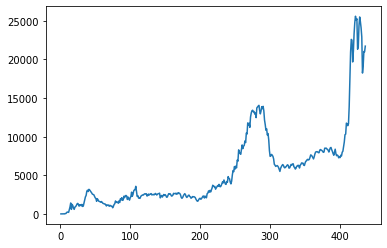

In [5]:
import matplotlib.pyplot as plt
plt.plot(X, data)

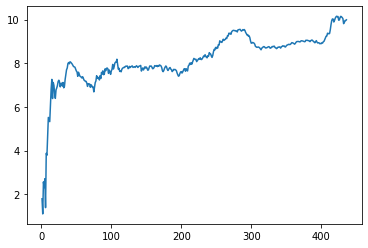

In [6]:
logarithmic_data = np.log(data)
plt.plot(X, logarithmic_data)

# Implement Linear Regression model by using Gradien Descent

In [7]:
def update(x, t, w, b, alpha):
  N = len(x)
  y = w * x + b
  dedw = np.dot((y - t), x)
  dedb = np.sum(y - t)
  w -= (1. * alpha / N) * dedw
  b -= (1. * alpha / N) * dedb
  return w, b

def cost(x, t, w, b):
  N = len(x)
  y = w * x + b
  err = np.sum((y - t)**2)
  return err/(2. * N)

def train_model(x, t, w, b, alpha, epochs):
  for e in range(epochs):
    w, b = update(x, t, w, b, alpha)
    if e % 500 == 0:
      # print(w, b)
      print('cost', cost(x, t, w, b))
  return w, b

### Train data

In [8]:
w = 0
b = 0
alpha = 0.001
epochs = 5000
w, b = train_model(X[:20], logarithmic_data[:20], w, b, alpha, epochs)
print(w, b)

cost 9.528370157294562
cost 0.5658770023978728
cost 0.5183229194760285
cost 0.48136875398713047
cost 0.45265175929236817
cost 0.43033585056086804
cost 0.4129942106084301
cost 0.3995180631721619
cost 0.3890457808377278
cost 0.38090779497709903
0.30800571480899014 1.0786848706456644


### Plot predictions

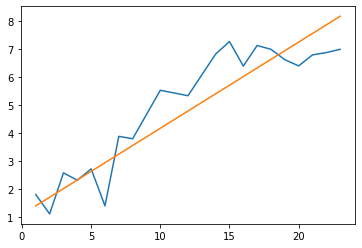

In [9]:
logarithmic_data = np.log(data)
plt.plot(X[:20], logarithmic_data[:20])
y = w * X[:20] + b
plt.plot(X[:20], y)

# Implement Polynomial Regression

In [11]:
def update_polynomial(x, t, w, alpha):
  N = x.shape[1]
  y = np.dot(w.T, x)
  dedw = np.dot(x, (y - t).T) / N
  w = w - alpha * dedw 
  return w

def cost_polynomial(x, t, w):
  N = x.shape[1]
  y = np.dot(w.T, x)
  return np.sum((y - t)**2) / (2. * N)

def train_polynomial(x, t, w, alpha, epochs):
  for e in range(epochs):
    w = update_polynomial(x, t, w, alpha)
  return w

## select best polynomial model
this funtion starts from linear regression and increments degree of model until there is no improvement on validation cost and selects the best degree for polynomial model

In [12]:
def select_beset_model(x, t, alpha=0.0001, epochs=50000, early_stopping=3, logging=True):
  degree = 1
  min_cost = float('inf')
  stopping_round = 0
  stds = [np.std(x), np.std(t)]
  means = [np.mean(x), np.mean(t)]
  x = (x - means[0]) / stds[0] # normalization
  t = (t - means[1]) / stds[1] # normalization
  train, valid, test, train_y, valid_y, test_y = train_valid_test_split(x, t)
  while True:
    w = np.zeros((degree+1, 1))
    train_data = np.ones((1, len(train[0])))
    valid_data = np.ones((1, len(valid[0])))
    for i in range(1, degree+1): 
      train_data = np.append(train_data, np.power(train, i), axis=0)
      valid_data = np.append(valid_data, np.power(valid, i), axis=0)
    w = train_polynomial(train_data, train_y, w, alpha, epochs)
    cost = cost_polynomial(valid_data, valid_y, w)
    if logging:
      print('degree=', degree)
      print('cost=', cost)
    if cost < min_cost:
      min_cost = cost
      best_w = w
      best_degree = degree
      degree += 1
      stopping_round = 0
    elif stopping_round < early_stopping:
      stopping_round += 1
      degree += 1
    else:
      break
  test_data = np.ones((1, len(test[0])))
  for i in range(1, best_degree+1):
      test_data = np.append(test_data, np.power(test, i), axis=0)
  final_cost = cost_polynomial(test_data, test_y, best_w)
  return best_degree, best_w, final_cost, min_cost, stds, means

### Trin Data

In [13]:
X_poly = X.reshape(1, len(X))
data_poly = data.reshape(1, len(data))
log_poly = logarithmic_data.reshape(1, len(logarithmic_data))

In [14]:
def train_valid_test_split(x, y, train_size=0.7, valid_size=0.2):
  n = x.shape[1]
  np.random.seed(0)
  indices = np.random.permutation(n)
  train_idx, valid_idx, test_idx = indices[:int(n*train_size)], indices[int(n*train_size): int(n*(train_size + valid_size))], indices[int(n*(train_size + valid_size)):]
  train, valid, test = x[:,train_idx], x[:,valid_idx], x[:,test_idx]
  train_y, valid_y, test_y = y[:,train_idx], y[:,valid_idx], y[:,test_idx]
  return train, valid, test, train_y, valid_y, test_y

In [15]:
degree, w, test_cost, valid_cost, stds, means = select_beset_model(X_poly, data_poly)
print('-'*30)
print('Selected Model:')
print('\tdegree= ', degree)
print('\ttest cost= ', test_cost)
print('\tvalid cost= ', valid_cost)
print('\tw=', w)

degree= 1
cost= 0.17637853406559675
degree= 2
cost= 0.16771036598308994
degree= 3
cost= 0.17420469807100267
degree= 4
cost= 0.15661200225651659
degree= 5
cost= 0.1431269405975335
degree= 6
cost= 0.13153232843972643
degree= 7
cost= 0.11815654330450472
degree= 8
cost= 0.11820760587067836
degree= 9
cost= 0.11298146230858586
degree= 10
cost= 0.11198248076297794
degree= 11
cost= 0.11262536647015522


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in subtract
  """


degree= 12
cost= nan
degree= 13
cost= nan
degree= 14
cost= nan
------------------------------
Selected Model:
	degree=  10
	test cost=  0.166627113210911
	valid cost=  0.11198248076297794
	w= [[-0.11767521]
 [ 0.41923087]
 [-0.07277649]
 [ 0.08828143]
 [-0.08982547]
 [-0.01507494]
 [-0.02664291]
 [-0.0357057 ]
 [ 0.09123192]
 [ 0.02378257]
 [-0.01676656]]


### Plot Predictions

In [16]:
def predict(x, w, degree, stds, means):
  x = (x - means[0]) / stds[0]
  data = np.ones((1, len(x[0])))
  for i in range(1, degree+1):
    data = np.append(data, np.power(x, i), axis=0)
  y = np.dot(w.T, data) * stds[1] + means[1]
  return y

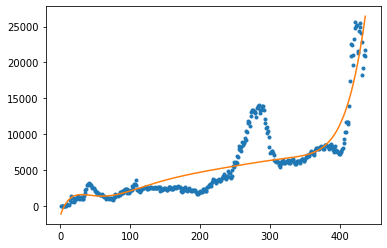

In [17]:
# print(degree, w, b, cost)
plt.plot(X_poly[0], data_poly[0], '.')
y = predict(X_poly, w, degree, stds, means)
plt.plot(X_poly[0], y[0])

## Improve Model
this function finds best **alpha** and **number of epochs** for our model

In [18]:
import random

def find_best_alpha_and_epochs():
  min_cost = float('inf')
  digit = [k for k in range(1, 10)]
  pow = [k for k in range(3, 5)]
  for i in range(50):
    r = -5 * random.random()
    alpha = round(10 ** r, 5) # random number between 1 and 1e-5
    epochs = random.choice(digit) * 10 ** random.choice(pow) # random number between 1e3 and 9e4
    print('alpha= ', alpha)
    print('epochs=', epochs)
    degree, w, test_cost, valid_cost, stds, means = select_beset_model(X_poly, data_poly, alpha=alpha, epochs=epochs, logging=False)
    print('cost=', valid_cost)
    print()
    if valid_cost < min_cost:
      min_cost = valid_cost
      best_alpha = alpha
      best_epochs = epochs
  return best_alpha, best_epochs, min_cost

In [20]:
alpha, epochs, cost = find_best_alpha_and_epochs()
print('-'*20)
print('Selected Params')
print('\talpha= ', alpha)
print('\tepochs=', epochs) 
print('\tcost=', cost)

alpha=  2e-05
epochs= 6000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in subtract
  """


cost= 0.16733225927529854

alpha=  0.0249
epochs= 80000
cost= 0.06825864132193084

alpha=  0.00012
epochs= 60000
cost= 0.10529506500862197

alpha=  0.03019
epochs= 50000
cost= 0.07683070260115152

alpha=  0.00201
epochs= 4000
cost= 0.10730997469871062

alpha=  0.31941
epochs= 1000
cost= 0.17115785513099233

alpha=  2e-05
epochs= 50000
cost= 0.13657263485495877

alpha=  0.04852
epochs= 20000
cost= 0.07683070268698201

alpha=  1e-05
epochs= 5000
cost= 0.174922983588204

alpha=  0.18099
epochs= 8000
cost= 0.17115785513099227

alpha=  0.67915
epochs= 80000
cost= 0.17115785513099235

alpha=  0.79351
epochs= 8000
cost= 0.17115785513099155

alpha=  0.05977
epochs= 90000
cost= 0.07683070260115006

alpha=  0.08412
epochs= 10000
cost= 0.14596471710572223

alpha=  0.73519
epochs= 40000
cost= 0.17115785513099233

alpha=  1e-05
epochs= 9000
cost= 0.16902924317396292

alpha=  0.03044
epochs= 6000
cost= 0.07734299925367866

alpha=  0.22122
epochs= 2000
cost= 0.1711578551309923

alpha=  0.00021
epochs

### Train and Plot Data
rerun select_best_model function to select best degree for polynomial regression base on new alpha and number of epoch and see the predictions result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in subtract
  """


degree=  6
test cost=  0.10164250703058779
valid cost=  0.06825851278695828
w= [[-0.18916504]
 [ 1.54904572]
 [ 0.3787866 ]
 [-1.5515361 ]
 [-0.57702351]
 [ 0.52114049]
 [ 0.21863517]]


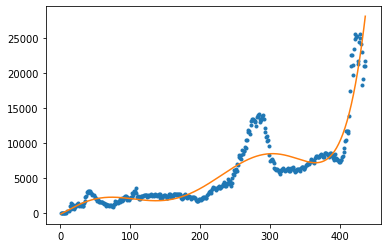

In [21]:
degree, w, test_cost, valid_cost, stds, means = select_beset_model(X_poly, data_poly, alpha=alpha, epochs=epochs, logging=False)
print('degree= ', degree)
print('test cost= ', test_cost)
print('valid cost= ', valid_cost)
print('w=', w)
plt.plot(X_poly[0], data_poly[0], '.')
y = predict(X_poly, w, degree, stds, means)
plt.plot(X_poly[0], y[0])